 ## Neural Network model to recognition handwritten digits from 0-9
 ### Dataset: MNIST DATABASE of handwritten digits

#### Load Libraries

In [64]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.activations import relu, linear 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#### Load datasets

In [68]:
def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    return X,y

In [70]:
X_train, y_train = load_data()

#### Shape of datasets

In [74]:
print(f"Shape of X_train is {X_train.shape}\n")
print(f"Shape of y_train is {y_train.shape}")

Shape of X_train is (5000, 400)

Shape of y_train is (5000, 1)


#### Accessing single value of X_train and y_train 

In [78]:
print(f"First value of X_train is\n {X_train[0]}\n")
print(f"First value of y_train is {y_train[0,0]}")

First value of X_train is
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

#### Visualization of Data

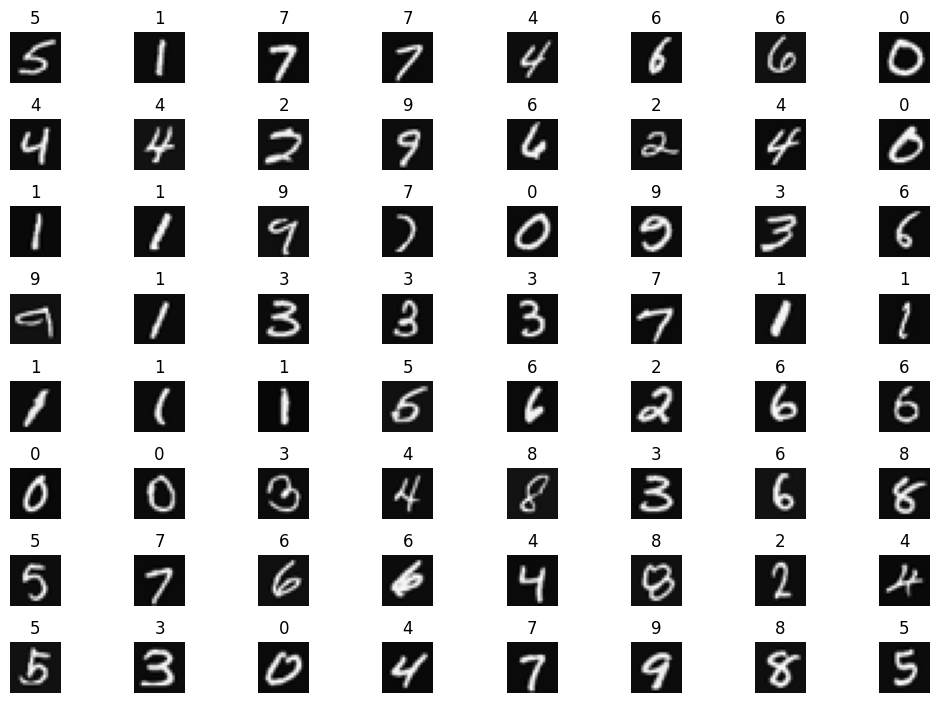

In [82]:
m,n = X_train.shape

fig,axes = plt.subplots(8,8 ,figsize=(10,8))
fig.tight_layout(pad=0.5, rect=[0,0.03,1,0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y_train[random_index, 0])
    ax.set_axis_off()

plt.show()

#### Train Model

In [88]:
tf.random.set_seed(1234)

In [96]:
model = Sequential([
    Input(shape=(400,)),
    Dense(units=25, activation='relu', name='layre1'),
    Dense(units=15, activation='relu', name='layre2'),
    Dense(units=10, activation='linear', name='layre3')
], name= "my_neural_network")

In [98]:
model.summary()

Model: "my_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layre1 (Dense)                  │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layre2 (Dense)                  │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layre3 (Dense)                  │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
[layer1, layer2, layer3] = model.layers

In [111]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()

In [119]:
print(f"w1:{w1.shape} b1:{b1.shape}")
print(f"w2:{w2.shape} b2:{b2.shape}")
print(f"w3:{w3.shape} b3:{b3.shape}")

w1:(400, 25) b1:(25,)
w2:(25, 15) b2:(15,)
w3:(15, 10) b3:(10,)


#### Compile model 

In [121]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.9739
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.7657
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.4827
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.3674
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.3051
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.2666
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.2385
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.2168
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.1985
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.1829
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.1689
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1570
Epoch 13/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.1464
Epoch 14/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.1367
Epoch 15/50
157/157 ━━━━━━━━━

#### Prediction

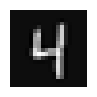

In [162]:
pred_img = X_train[2010]

fig, ax = plt.subplots(1, 1, figsize=(1, 1))
reshape_pred_img = pred_img.reshape((20,20)).T
ax.imshow(reshape_pred_img, cmap='gray')
ax.set_axis_off()
plt.show()

In [133]:
prediction = model.predict(pred_img.reshape(1,400))
print(f"Predicting: {prediction}")
print(f"\nLargest prediction value: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicting: [[-7.624373   -7.400168   -0.08813261 -6.636823   13.4301405  -7.7566347
  -3.5251448  -4.992523   -2.3980122   3.3977072 ]]

Largest prediction value: 4


#### Prediction using Softmax

In [146]:
predition_softmax = tf.nn.softmax(prediction)
print(f"predecting: {predition_softmax}")
print(f" Total prediction: {round(np.sum(predition_softmax))}\n")
y_hat = np.argmax(predition_softmax)
print("Final result",y_hat)

predecting: [[7.1799433e-10 8.9844604e-10 1.3460733e-06 1.9275643e-09 9.9995446e-01
  6.2904348e-10 4.3290544e-08 9.9797264e-09 1.3362904e-07 4.3949072e-05]]
 Total prediction: 1

Final result 4


#### Random X_train values prediction 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1

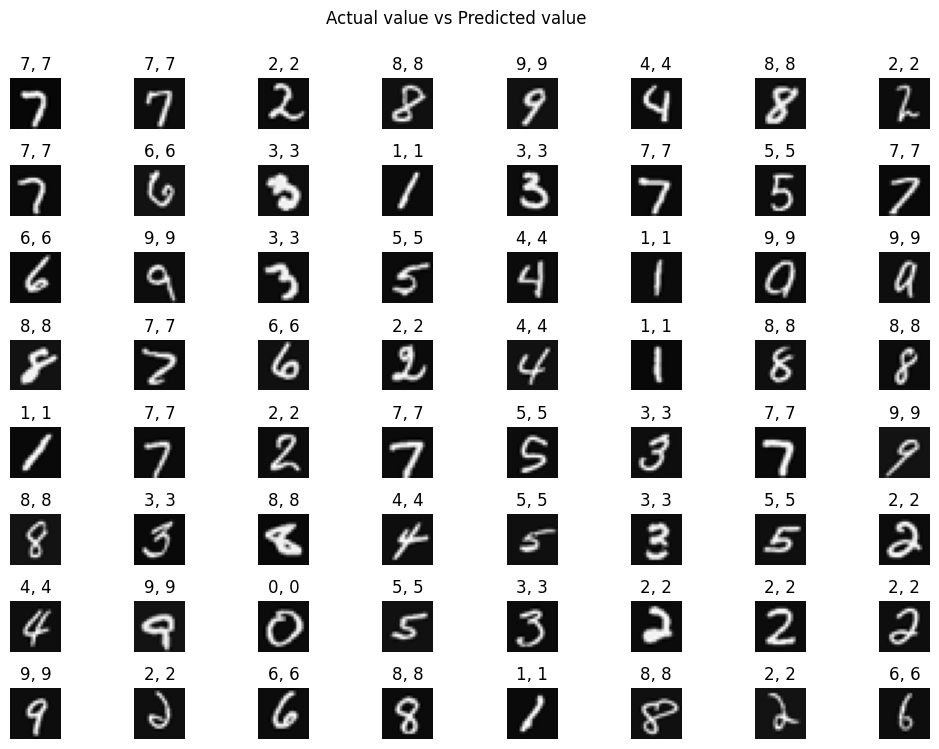

In [184]:
m,n = X_train.shape

fig, axes = plt.subplots(8, 8, figsize=(10, 8))
fig.tight_layout(pad=0.5, rect=[0,0.03,1,0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')

    predictions = model.predict(X_train[random_index].reshape(1,400))
    prediction_sm = tf.nn.softmax(predictions)
    yhat = np.argmax(prediction_sm)

    ax.set_title(f"{y_train[random_index, 0]}, {yhat}")
    ax.set_axis_off()
plt.suptitle("Actual value vs Predicted value")
plt.show()